In [1]:
import math
import numpy as np 
import pylab as pl
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy import fftpack  
import scipy.signal as signal
from scipy import interpolate
import pandas as pd

In [2]:
#判定当前的时间序列是否是单调序列
def ismonotonic(x):
    max_peaks=signal.argrelextrema(x,np.greater)[0]
    min_peaks=signal.argrelextrema(x,np.less)[0]
    all_num=len(max_peaks)+len(min_peaks)
    if all_num>0:
        return False
    else:
        return True

In [3]:
#寻找当前时间序列的极值点
def findpeaks(x):
    return signal.argrelextrema(x,np.greater)[0]

In [4]:
#判断当前的序列是否为 IMF 序列
def isImf(x):
    N=np.size(x)
    pass_zero=np.sum(x[0:N-2]*x[1:N-1]<0)#过零点的个数
    peaks_num=np.size(findpeaks(x))+np.size(findpeaks(-x))#极值点的个数
    if abs(pass_zero-peaks_num)>1:
        return False
    else:
        return True

In [5]:
#获取当前样条曲线
def getspline(x):
    N=np.size(x)
    peaks=findpeaks(x)
    print('当前极值点个数：',len(peaks))
    if(len(peaks)<=3):
        if(len(peaks)<2):
            peaks=np.concatenate(([0],peaks))
            peaks=np.concatenate((peaks,[N-1]))#这里是为了防止样条次数不够，无法插值的情况
        t=interpolate.splrep(peaks,y=x[peaks], w=None, xb=None, xe=None,k=len(peaks)-1)
        return interpolate.splev(np.arange(N),t)
    t=interpolate.splrep(peaks,y=x[peaks])
    return interpolate.splev(np.arange(N),t)
#     f=interp1d(np.concatenate(([0,1],peaks,[N+1])),np.concatenate(([0,1],x[peaks],[0])),kind='cubic')
#     f=interp1d(peaks,x[peaks],kind='cubic')
#     return f(np.linspace(1,N,N))

In [9]:
#经验模态分解方法
def emd(x):
    imf=[]
    m=0
    i=0
    while not ismonotonic(x) and  m<7:
        x1=x
        sd=np.inf
        while sd>0.1 or (not isImf(x1)):
            #print (isImf(x1))
            s1=getspline(x1)
            s2=-getspline(-1*x1)
            x2=x1-(s1+s2)/2
            sd=np.sum((x1-x2)**2)/np.sum(x1**2)
            x1=x2
        
        imf.append(x1)
        print('第%d个分量'%i)
        i=i+1
        m=(np.array(imf).shape)[0]
        print('分解个数：',m)
        x=x-x1

    imf.append(x)
    #if m>5:
        #break
    return imf

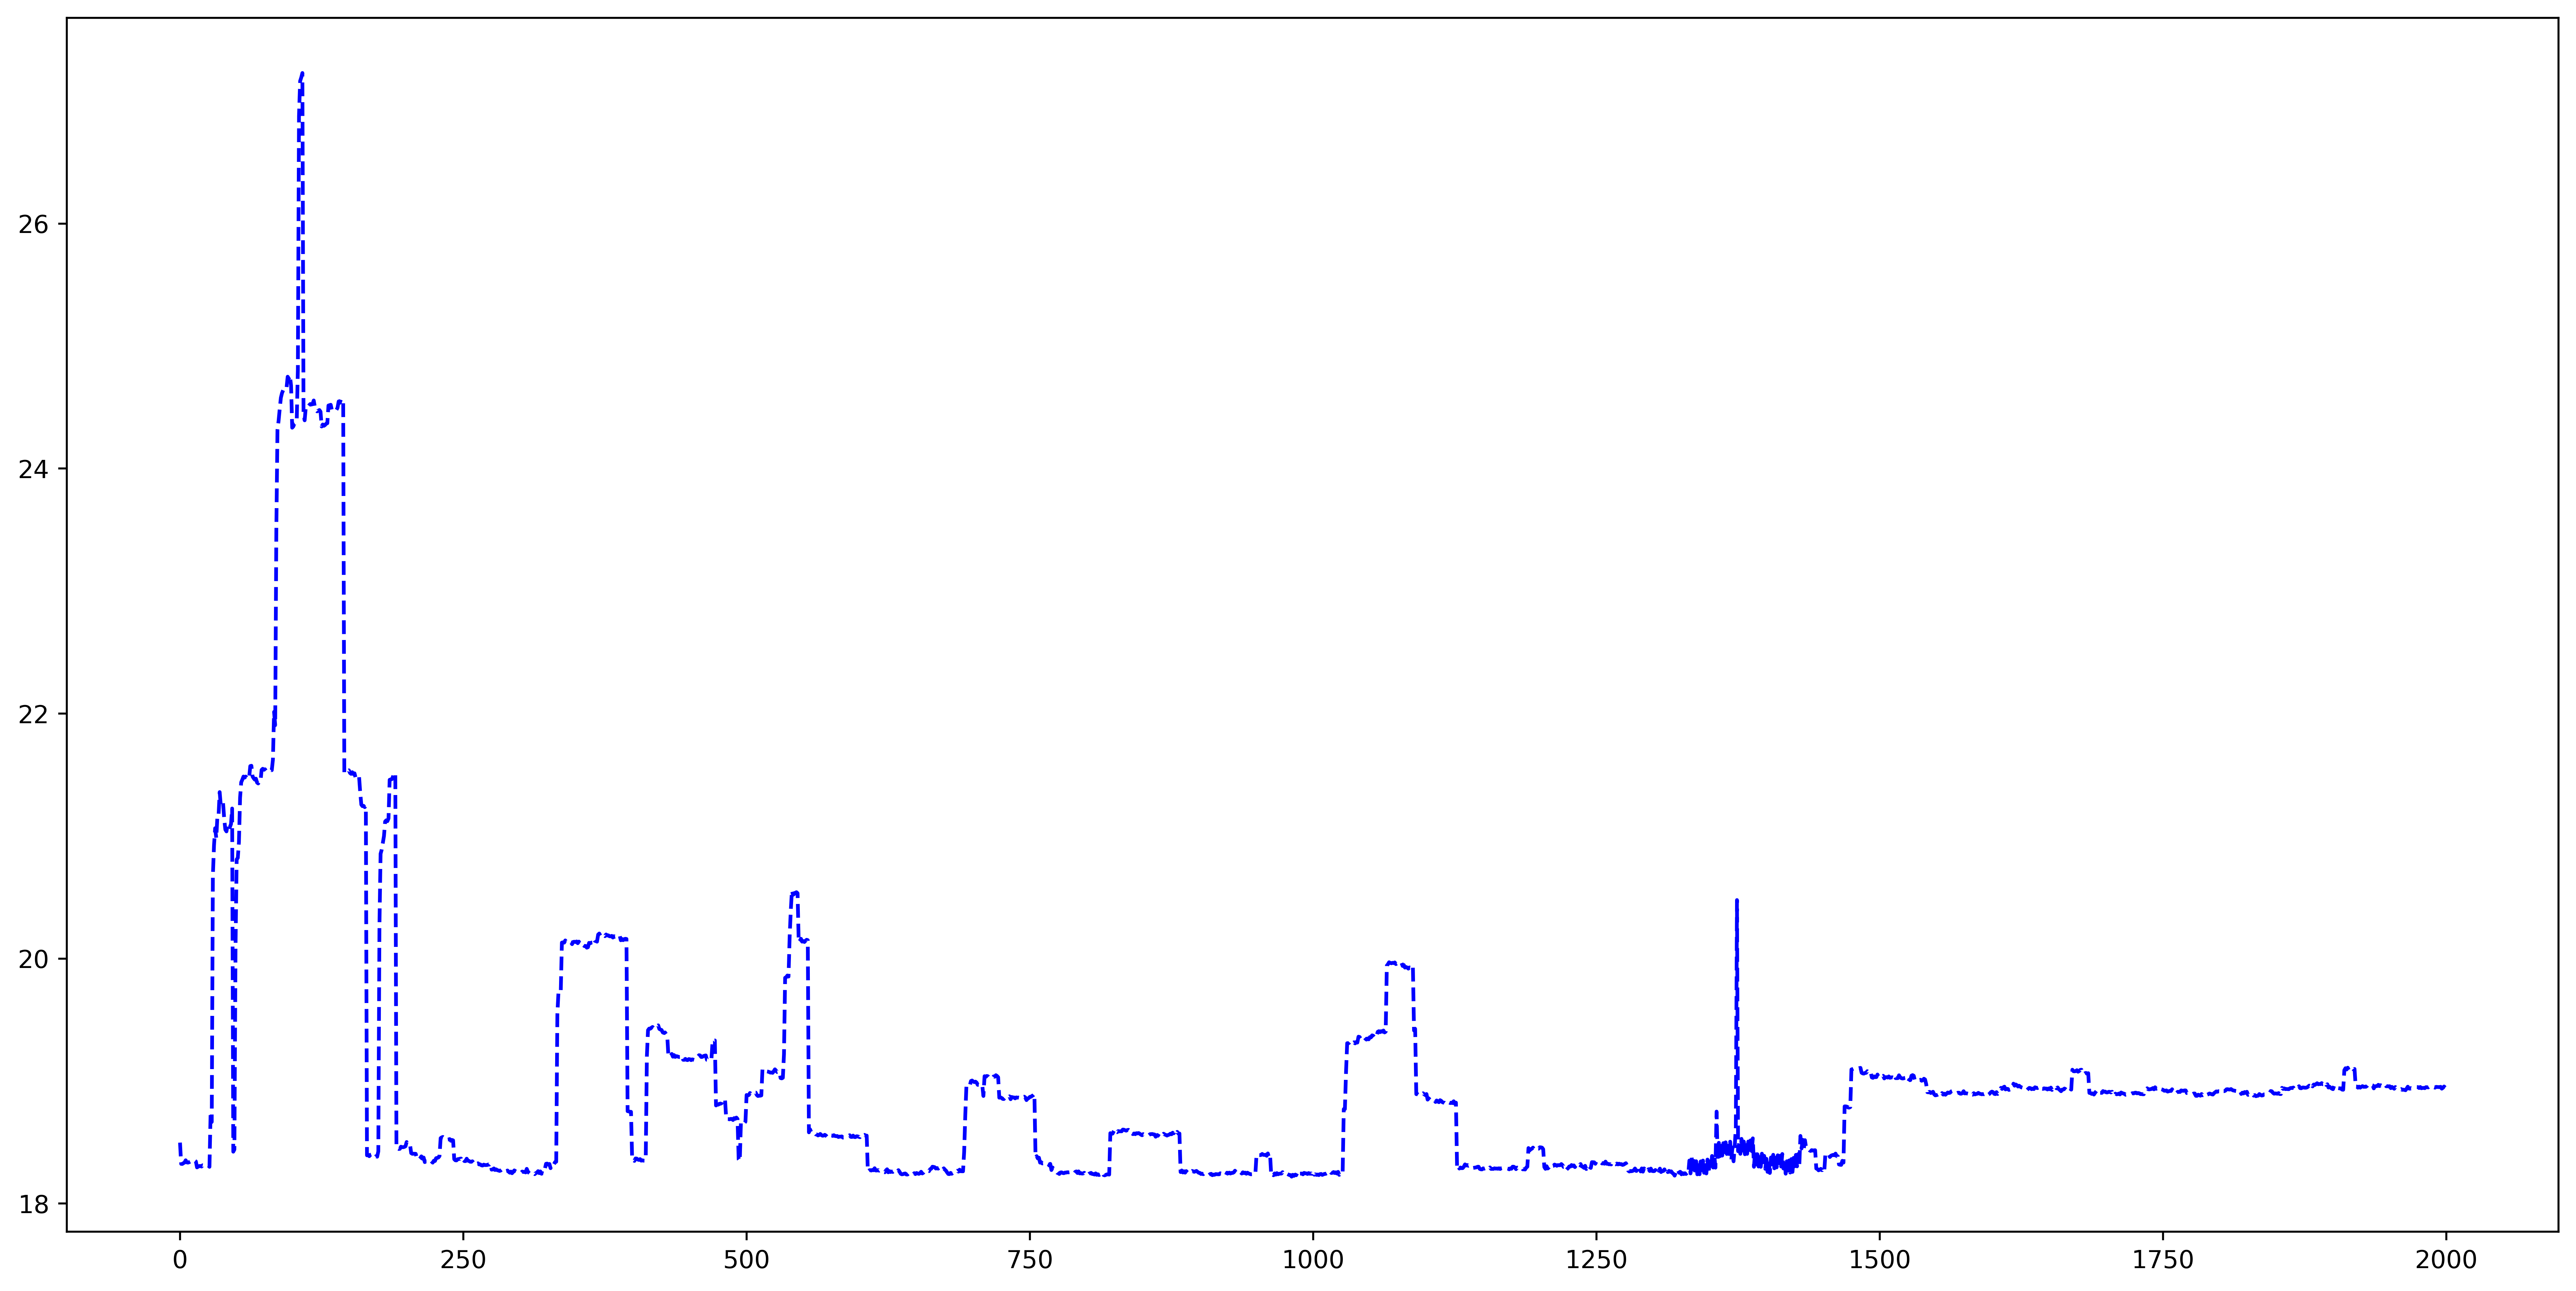

In [19]:
#导入CPU数据
cp=pd.read_excel(r'C:\Users\stu\Desktop\RDATA.xlsx').values
cpu=cp[:,2][0:2000]
mv=cpu.size
tt=np.arange(0,mv,1)
tt.size
plt.figure(figsize=(18,9),dpi=500)
plt.plot(tt,cpu,linestyle='dashed',marker='',color = 'b')
cpu=np.array(cpu,dtype=np.float)
#min1=np.mean(cpu)
#cpu=cpu-min1
#cpu
#plt.plot(tt,cpu,linestyle='dashed',marker='',color = 'b')

In [20]:
n=10#迭代次数
o1=[]#生成n行原始数据
#o2=[]#生成n行原始数据加正噪声
#o3=[]#生成n行原始数据加负噪声
IMF=np.zeros((8,2000))#保存最终的IMF序列
#imfz=[]#保存迭代过程中的正IMF序列
#imff=[]#保存迭代过程中的负IMF序列
for i in range(n):
    o1.append(cpu)
for i in range(n):
    o2=[]
    o3=[]
    m=np.random.normal(0,0.15,mv)
    o2=o1[i]+m
    print('shujudaxiao:',(np.array(o2)).shape)
    print((np.array(o2))[0])
    o3=o1[i]-m
    #for j in 
    imfz=emd(o2)
    imff=emd(o3)
    IMF+=(np.array(imfz)+np.array(imff))
FIMF=IMF/(2*n)
print(FIMF)
#print(imfz,imff)

shujudaxiao: (2000,)
18.392726157652085
当前极值点个数： 654
当前极值点个数： 654
当前极值点个数： 677
当前极值点个数： 677
当前极值点个数： 679
当前极值点个数： 679
当前极值点个数： 683
当前极值点个数： 683
当前极值点个数： 682
当前极值点个数： 682
当前极值点个数： 683
当前极值点个数： 683
当前极值点个数： 684
当前极值点个数： 684
当前极值点个数： 685
当前极值点个数： 685
当前极值点个数： 689
当前极值点个数： 689
第0个分量
分解个数： 1
当前极值点个数： 313
当前极值点个数： 312
当前极值点个数： 322
当前极值点个数： 322
当前极值点个数： 320
当前极值点个数： 320
当前极值点个数： 319
当前极值点个数： 320
当前极值点个数： 321
当前极值点个数： 321
当前极值点个数： 321
当前极值点个数： 322
第1个分量
分解个数： 2
当前极值点个数： 141
当前极值点个数： 140
当前极值点个数： 148
当前极值点个数： 148
当前极值点个数： 148
当前极值点个数： 148
当前极值点个数： 151
当前极值点个数： 151
第2个分量
分解个数： 3
当前极值点个数： 62
当前极值点个数： 62
当前极值点个数： 64
当前极值点个数： 64
当前极值点个数： 64
当前极值点个数： 64
第3个分量
分解个数： 4
当前极值点个数： 23
当前极值点个数： 23
当前极值点个数： 23
当前极值点个数： 23
当前极值点个数： 23
当前极值点个数： 24
当前极值点个数： 23
当前极值点个数： 24
第4个分量
分解个数： 5
当前极值点个数： 9
当前极值点个数： 9
当前极值点个数： 9
当前极值点个数： 9
第5个分量
分解个数： 6
当前极值点个数： 3
当前极值点个数： 2
当前极值点个数： 3
当前极值点个数： 2
第6个分量
分解个数： 7
当前极值点个数： 647
当前极值点个数： 648
当前极值点个数： 668
当前极值点个数： 669
当前极值点个数： 674
当前极值点个数： 675
当前极值点个数： 678
当前极值点个数： 679
当前极值点个数：

In [8]:
mv

2000

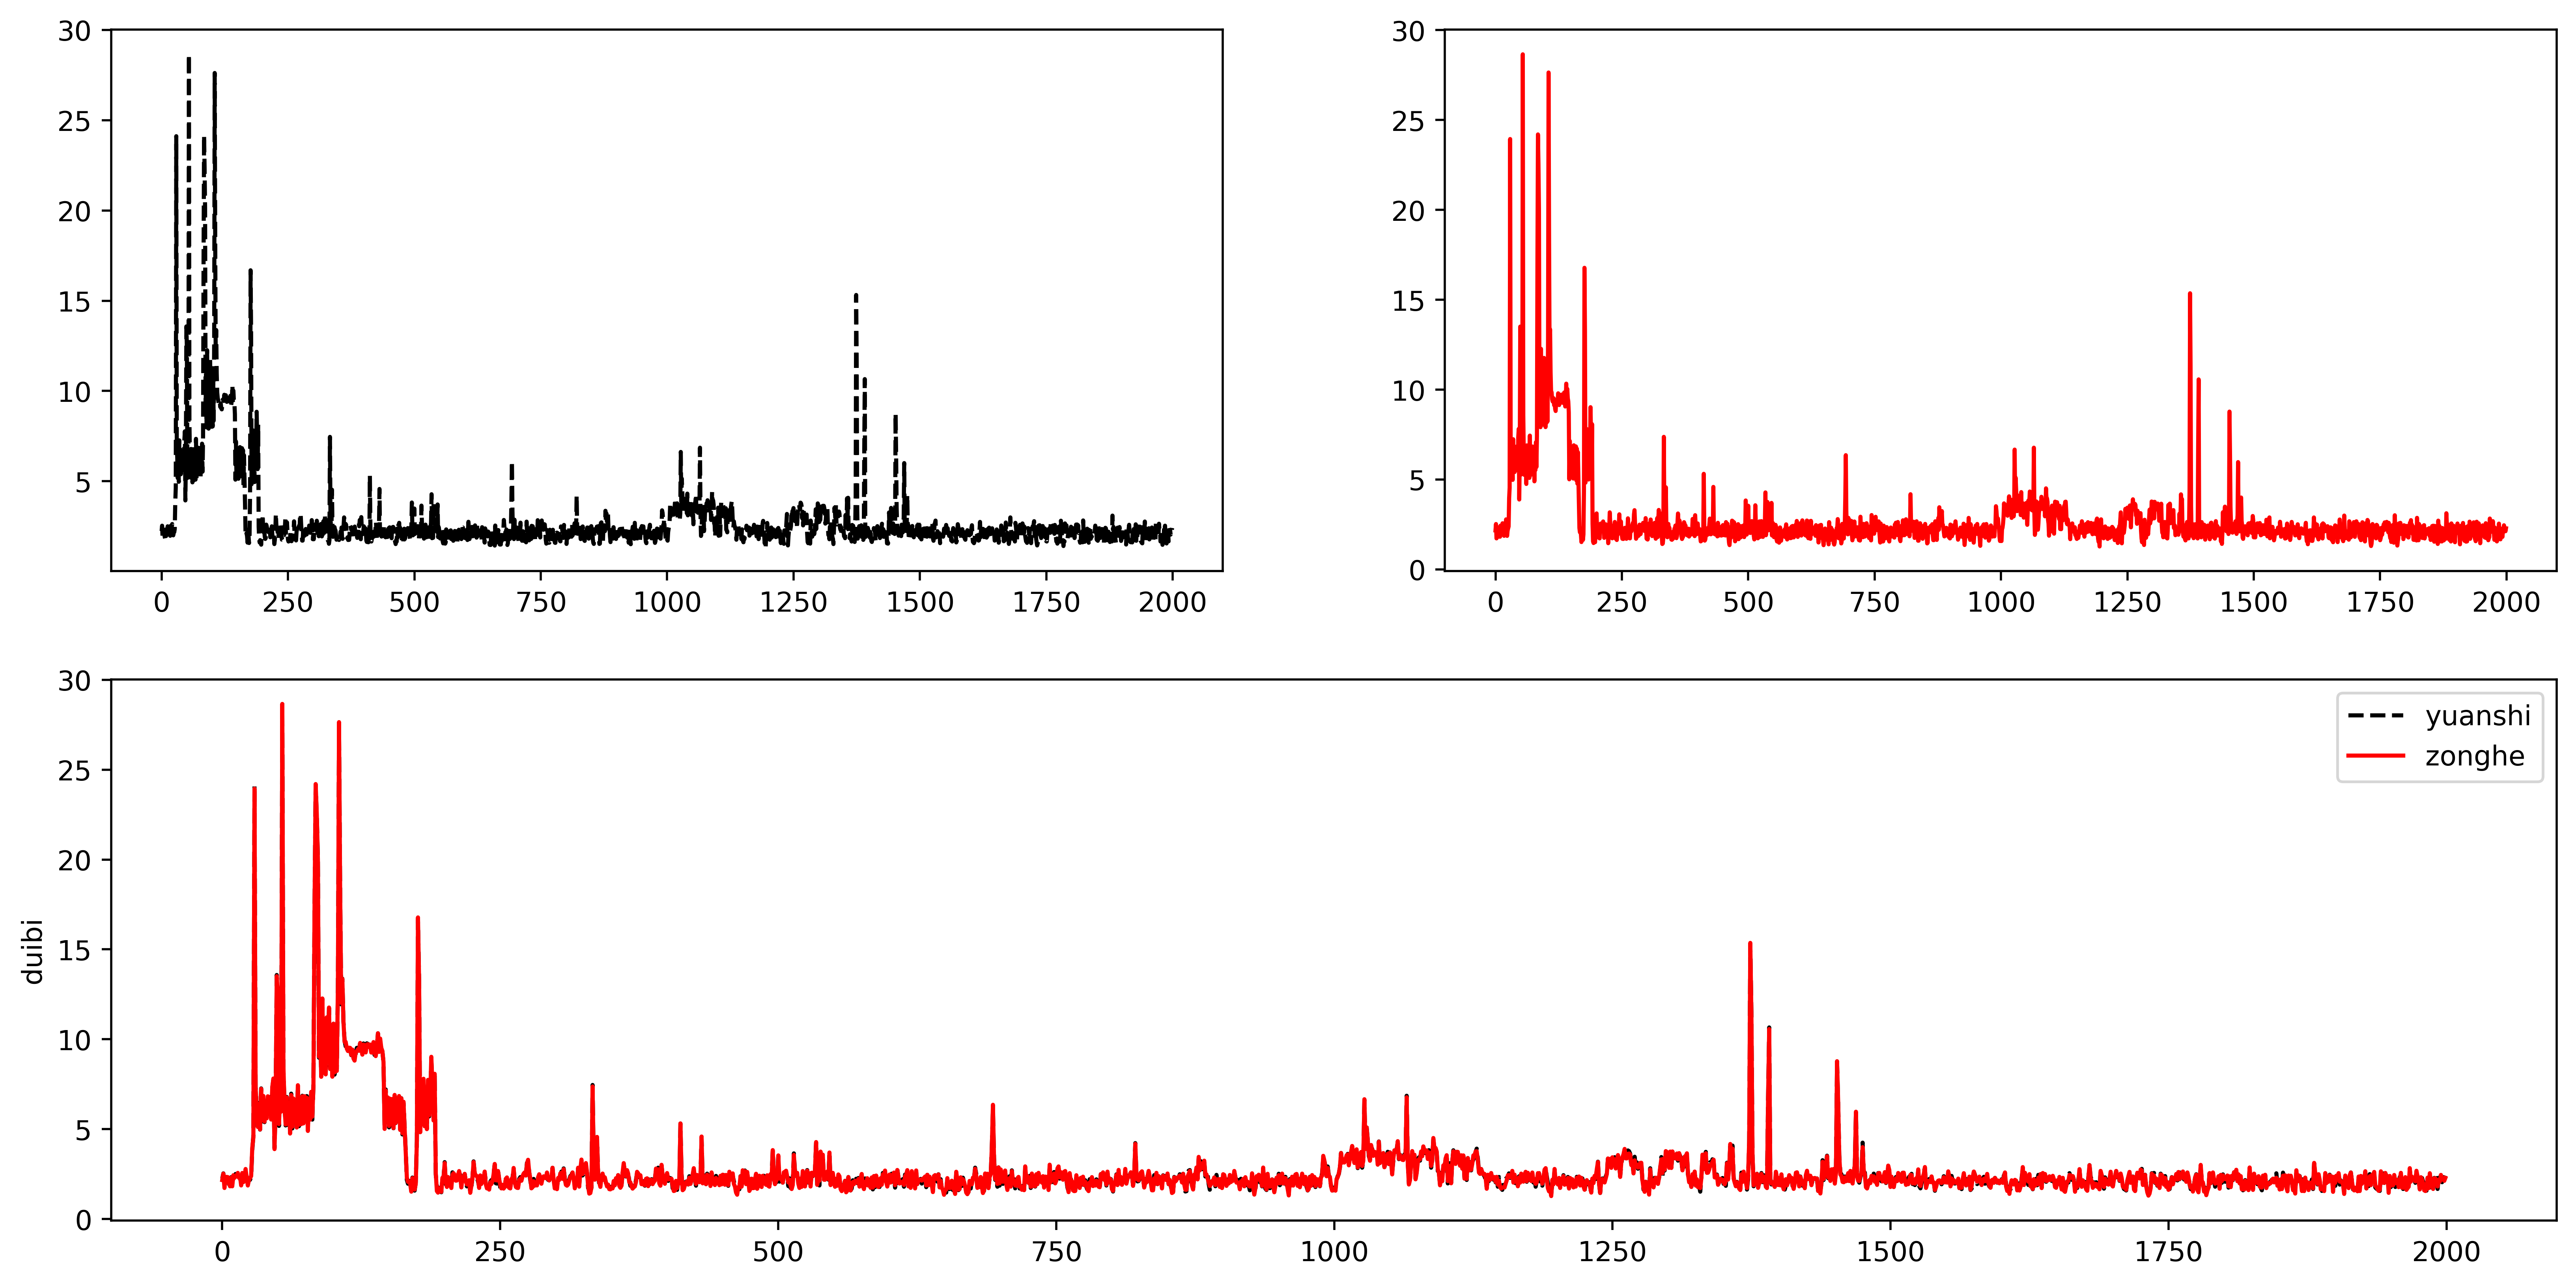

In [9]:
'''
def wgn(x, snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)/len(x)
    npower = xpower / snr
    return np.random.randn(len(x)) * np.sqrt(npower)
import random
sampling_rate=6000
f0=92
fg=4000
fft_size = 512
t=np.arange(0, 0.2, 1.0/sampling_rate)
x1=0.6*(1+np.sin(2*np.pi*f0*t))*np.sin(2*np.pi*fg*t)
x1+=wgn(x1, 3)
plt.figure(figsize=(16,4),dpi=500)
xx=x1
plt.plot(t,xx,linestyle='dashed',marker='',color = 'black')


mu = 0
sigma =1
for i in range(x1.size):
    x1[i] += random.gauss(mu,sigma)

print(len(x1))
plt.plot(t,x1,linestyle='-',marker='',color = 'red')
plt.legend()
plt.show()

#第二种噪声数据插入
m=np.random.normal(0,0.15,len(x1))
xx2=x1+m
plt.figure(figsize=(16,4),dpi=500)
plt.plot(t,xx,linestyle='dashed',marker='',color = 'black')
plt.plot(t,xx2,linestyle='-',marker='',color = 'red')
plt.ylabel('duibi')
plt.legend(['yuanshi','zonghe'])
plt.ylim((-3, 3))
plt.show()
'''
#cpu加噪声图
m=np.random.normal(0,0.1,mv)
xx3=cpu+m
plt.figure(figsize=(16,8),dpi=500)
plt.subplot(221)
plt.plot(tt,cpu,linestyle='dashed',marker='',color = 'black')
plt.subplot(222)
plt.plot(tt,xx3,linestyle='-',marker='',color = 'red')
plt.subplot(212)
plt.plot(tt,cpu,linestyle='dashed',marker='',color = 'black')
plt.plot(tt,xx3,linestyle='-',marker='',color = 'red')
plt.ylabel('duibi')
plt.legend(['yuanshi','zonghe'])
#plt.ylim((-3, 3))
plt.show()


In [10]:
#print(len(x1))
print(len(cpu))

2000


In [11]:
#print(x1)
#print(type(x1))
#print(x1.size)
print(cpu)
print(type(cpu))
print(cpu.size)

[2.25       2.54166667 1.80833333 ... 2.28333333 2.24166667 2.41666667]
<class 'numpy.ndarray'>
2000


In [21]:
n=10#迭代次数
o1=[]#生成n行原始数据
#o2=[]#生成n行原始数据加正噪声
#o3=[]#生成n行原始数据加负噪声
IMF=np.zeros((8,2000))#保存最终的IMF序列
#imfz=[]#保存迭代过程中的正IMF序列
#imff=[]#保存迭代过程中的负IMF序列
for i in range(n):
    o1.append(cpu)
for i in range(n):
    o2=[]
    o3=[]
    m=np.random.normal(0,0.15,mv)
    o2=o1[i]+m
    print('shujudaxiao:',(np.array(o2)).shape)
    print((np.array(o2))[0])
    o3=o1[i]-m
    #for j in 
    imfz=emd(o2)
    imff=emd(o3)
    IMF+=(np.array(imfz)+np.array(imff))
FIMF=IMF/(2*n)
print(FIMF)
#print(imfz,imff)

shujudaxiao: (2000,)
18.492359089833663
当前极值点个数： 661
当前极值点个数： 662
当前极值点个数： 692
当前极值点个数： 692
当前极值点个数： 699
当前极值点个数： 698
当前极值点个数： 701
当前极值点个数： 701
当前极值点个数： 702
当前极值点个数： 701
当前极值点个数： 703
当前极值点个数： 703
当前极值点个数： 703
当前极值点个数： 702
第0个分量
分解个数： 1
当前极值点个数： 318
当前极值点个数： 319
当前极值点个数： 321
当前极值点个数： 322
当前极值点个数： 323
当前极值点个数： 324
当前极值点个数： 324
当前极值点个数： 325
当前极值点个数： 323
当前极值点个数： 324
当前极值点个数： 323
当前极值点个数： 324
当前极值点个数： 323
当前极值点个数： 324
当前极值点个数： 324
当前极值点个数： 325
当前极值点个数： 324
当前极值点个数： 325
当前极值点个数： 325
当前极值点个数： 326
当前极值点个数： 326
当前极值点个数： 327
第1个分量
分解个数： 2
当前极值点个数： 149
当前极值点个数： 149
当前极值点个数： 154
当前极值点个数： 154
当前极值点个数： 154
当前极值点个数： 154
当前极值点个数： 155
当前极值点个数： 155
当前极值点个数： 155
当前极值点个数： 155
当前极值点个数： 155
当前极值点个数： 155
当前极值点个数： 156
当前极值点个数： 156
当前极值点个数： 157
当前极值点个数： 157
当前极值点个数： 158
当前极值点个数： 158
当前极值点个数： 159
当前极值点个数： 159
第2个分量
分解个数： 3
当前极值点个数： 73
当前极值点个数： 74
当前极值点个数： 73
当前极值点个数： 74
当前极值点个数： 75
当前极值点个数： 76
当前极值点个数： 75
当前极值点个数： 76
当前极值点个数： 75
当前极值点个数： 76
当前极值点个数： 75
当前极值点个数： 76
第3个分量
分解个数： 4
当前极值点个数： 31
当前极值点个数： 30
当前极值点个数：

In [14]:
FIMF.shape

(8, 2000)

In [15]:
print(FIMF[1])
print(FIMF[1,:].shape)

[  67.40631517   63.64138436   60.2912189  ... -300.43364959 -337.01670138
 -372.36084841]
(2000,)


In [22]:
import xlsxwriter   #导入模块

workbook = xlsxwriter.Workbook('G2.xlsx')     #新建excel表
worksheet= workbook.add_worksheet('sheet1')       #新建sheet（sheet的名称为"sheet1"）
headings = ['IMF1','IMF2','IMF3','IMF4','IMF5','IMF6','IMF7','IMF8']     #设置表头
worksheet.write_row('A1',headings)
worksheet.write_column('A2',np.array(FIMF)[0,:])
worksheet.write_column('B2',np.array(FIMF)[1,:])
worksheet.write_column('C2',np.array(FIMF)[2,:]) 
worksheet.write_column('D2',np.array(FIMF)[3,:])
worksheet.write_column('E2',np.array(FIMF)[4,:])
worksheet.write_column('F2',np.array(FIMF)[5,:]) 
worksheet.write_column('G2',np.array(FIMF)[6,:])
worksheet.write_column('H2',np.array(FIMF)[7,:]) 
#将数据插入到表格中 
workbook.close()          #将excel文件保存关闭，如果没有这一行运行代码会报错

In [23]:
cpu=np.array(cpu,dtype=np.float)
cpu.dtype

dtype('float64')

In [10]:
type(FIMF)
print(len(FIMF))
k=0
c=0
for i in range(len(FIMF)):
    k+=FIMF[i][0]
for i in range(len(FIMF)):
    c+=FIMF[i][1]
print(k)
print(c)
print(FIMF)
FIMF[1]

8
2.2499999999999627
2.54166666700001
[[  0.37117097   0.36239511  -0.49876328 ...   1.08130658   1.30073711
    1.72576467]
 [ 61.32862939  53.44958553  46.1665887  ...  -1.64197658  -2.14111685
   -2.66838461]
 [-30.25936283 -25.55601647 -21.40244982 ...  -0.41617941  -0.3541494
   -0.27136541]
 ...
 [ -8.6743064   -8.81978054  -8.9534748  ...  -0.21210673  -0.19972095
   -0.18713336]
 [  9.50639414   9.46448944   9.42228621 ...  -1.08828198  -1.09698076
   -1.10572538]
 [  5.32831177   5.31189962   5.29555401 ...   3.67541305   3.68084777
    3.6863026 ]]


array([61.32862939, 53.44958553, 46.1665887 , ..., -1.64197658,
       -2.14111685, -2.66838461])

In [16]:
print(imfz,(np.array(imfz)).shape)

[array([-1.66709077, -0.01703401, -0.28358422, ...,  0.53068386,
        0.60038454,  1.00294348]), array([104.28245479,  89.41789812,  76.13437761, ...,  -1.00098249,
        -1.56769744,  -1.86454483]), array([-55.78476062, -47.21755415, -39.54642851, ...,   1.58017409,
         1.90723671,   2.288372  ]), array([87.49327438, 84.37551474, 81.21942182, ..., -3.92566634,
       -4.12091956, -4.32573993]), array([-110.45491701, -102.81754288,  -95.48909978, ...,   -0.42214693,
         -0.40192243,   -0.38077861]), array([-32.40889888, -31.53916877, -30.68252499, ...,   3.04243375,
         3.11861954,   3.19594478]), array([6.25469101, 6.21306353, 6.17161805, ..., 0.94069083, 0.94669633,
       0.95273903]), array([4.48205789, 4.47236131, 4.46268964, ..., 1.52424661, 1.52291657,
       1.52159186])] (8, 2000)


In [17]:
print(imff,(np.array(imff)).shape)

[array([  3.96645146,   1.69412758,  -0.12169567, ...,  -8.04099919,
       -12.8552194 , -19.51212462]), array([-85.17244799, -74.59396798, -65.36119622, ...,   8.35874592,
        13.34373286,  19.94830681]), array([-396.8225493 , -369.27248641, -343.15147403, ...,  -10.76842286,
        -11.54700005,  -12.35543183]), array([586.95808286, 543.88018738, 502.93928145, ...,  11.02204637,
        11.81844594,  12.65182355]), array([-1.01478270e+02, -9.47506069e+01, -8.82939416e+01, ...,
       -6.70249892e-02, -7.01527707e-02, -7.32588883e-02]), array([-19.09965487, -18.62317744, -18.15309802, ...,   9.8578742 ,
         9.89263984,   9.92743244]), array([ 9.37359538,  9.29252481,  9.21189484, ..., -9.60152486,
       -9.63447742, -9.66748614]), array([4.57798195, 4.56919436, 4.56042628, ..., 1.53653869, 1.53005007,
       1.52354422])] (8, 2000)


In [18]:
zh=(np.array(imfz)+np.array(imff))
zh.shape
zh

array([[ 2.29936069e+00,  1.67709357e+00, -4.05279885e-01, ...,
        -7.51031533e+00, -1.22548349e+01, -1.85091811e+01],
       [ 1.91100068e+01,  1.48239301e+01,  1.07731814e+01, ...,
         7.35776343e+00,  1.17760354e+01,  1.80837620e+01],
       [-4.52607310e+02, -4.16490041e+02, -3.82697903e+02, ...,
        -9.18824877e+00, -9.63976334e+00, -1.00670598e+01],
       ...,
       [-5.15085538e+01, -5.01623462e+01, -4.88356230e+01, ...,
         1.29003079e+01,  1.30112594e+01,  1.31233772e+01],
       [ 1.56282864e+01,  1.55055883e+01,  1.53835129e+01, ...,
        -8.66083403e+00, -8.68778109e+00, -8.71474712e+00],
       [ 9.06003985e+00,  9.04155567e+00,  9.02311592e+00, ...,
         3.06078529e+00,  3.05296664e+00,  3.04513608e+00]])

In [19]:
imf1=emd(x1)
n1=len(imf1)
#print(imf1)
n1

NameError: name 'x1' is not defined

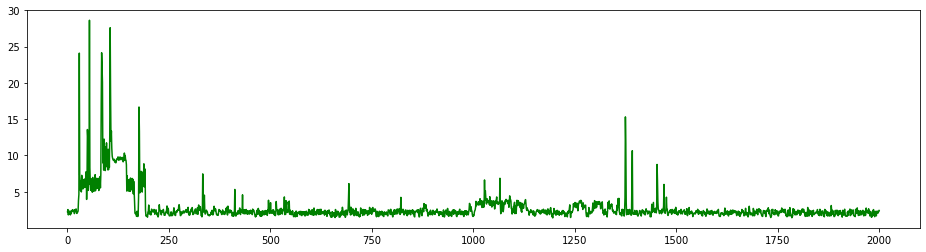

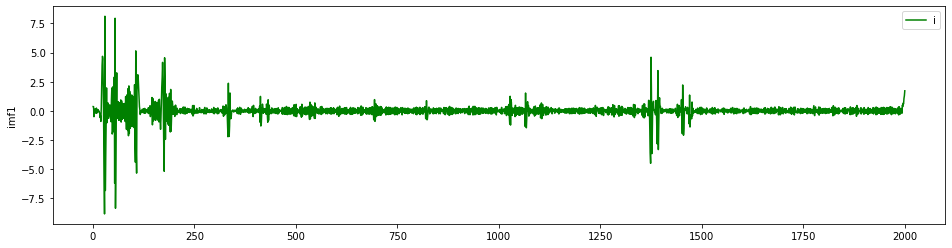

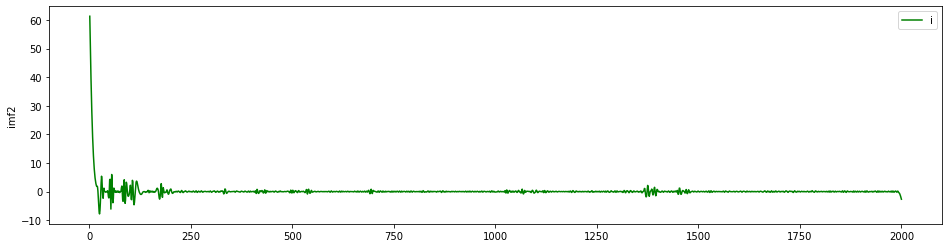

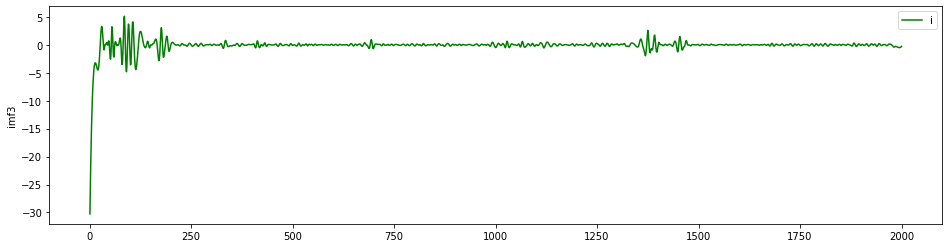

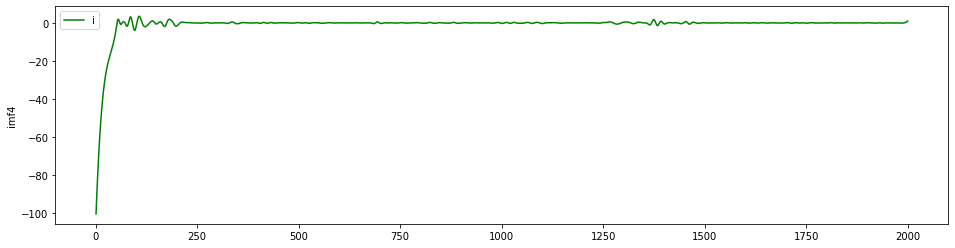

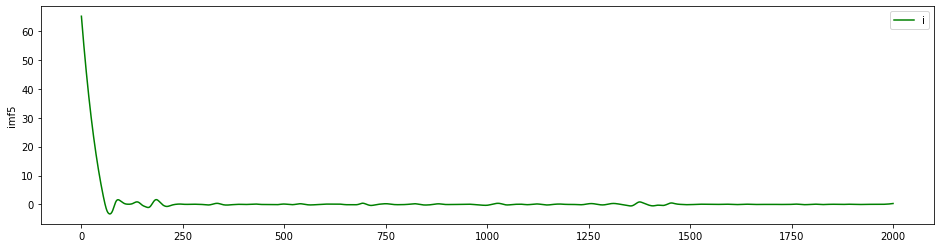

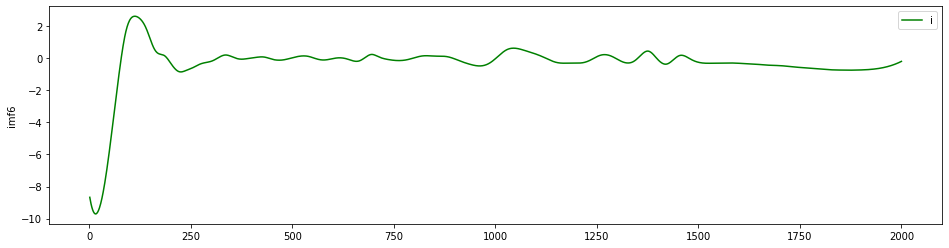

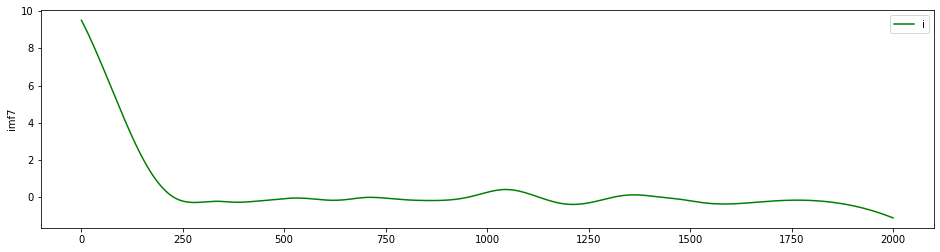

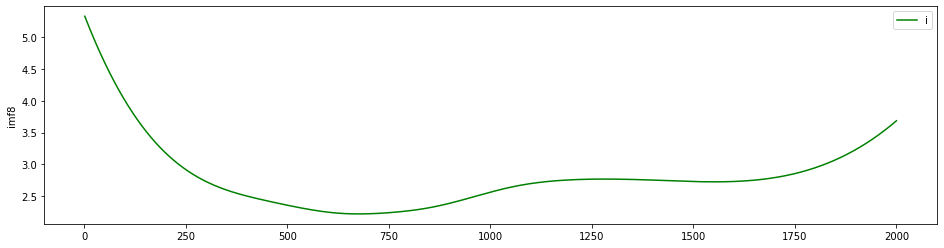

IndexError: index 8 is out of bounds for axis 0 with size 8

<Figure size 1152x288 with 0 Axes>

In [11]:
t=np.arange(1,2001,1)
plt.figure(figsize=(16,4))
plt.plot(t,cpu,'g')
for i in range(9):
    plt.figure(figsize=(16,4))
    #plt.subplot(12,1,1)
    plt.plot(t,FIMF[i],'g')
    plt.ylabel('imf%d'%(i+1))
    plt.legend('imf%d'%(i+1))
    plt.show()
plt.savefig('000.png')

In [ ]:
FIMF

In [21]:
np.zeros((10,4))+np.ones((10,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [40]:
a=[[1,2,3,4],[5,6,2,3]]
(np.array(a)).shape

(2, 4)

In [42]:
a+np.ones((2,4))

array([[2., 3., 4., 5.],
       [6., 7., 3., 4.]])

In [23]:
np.arange(1,2001,1)

array([   1,    2,    3, ..., 1998, 1999, 2000])

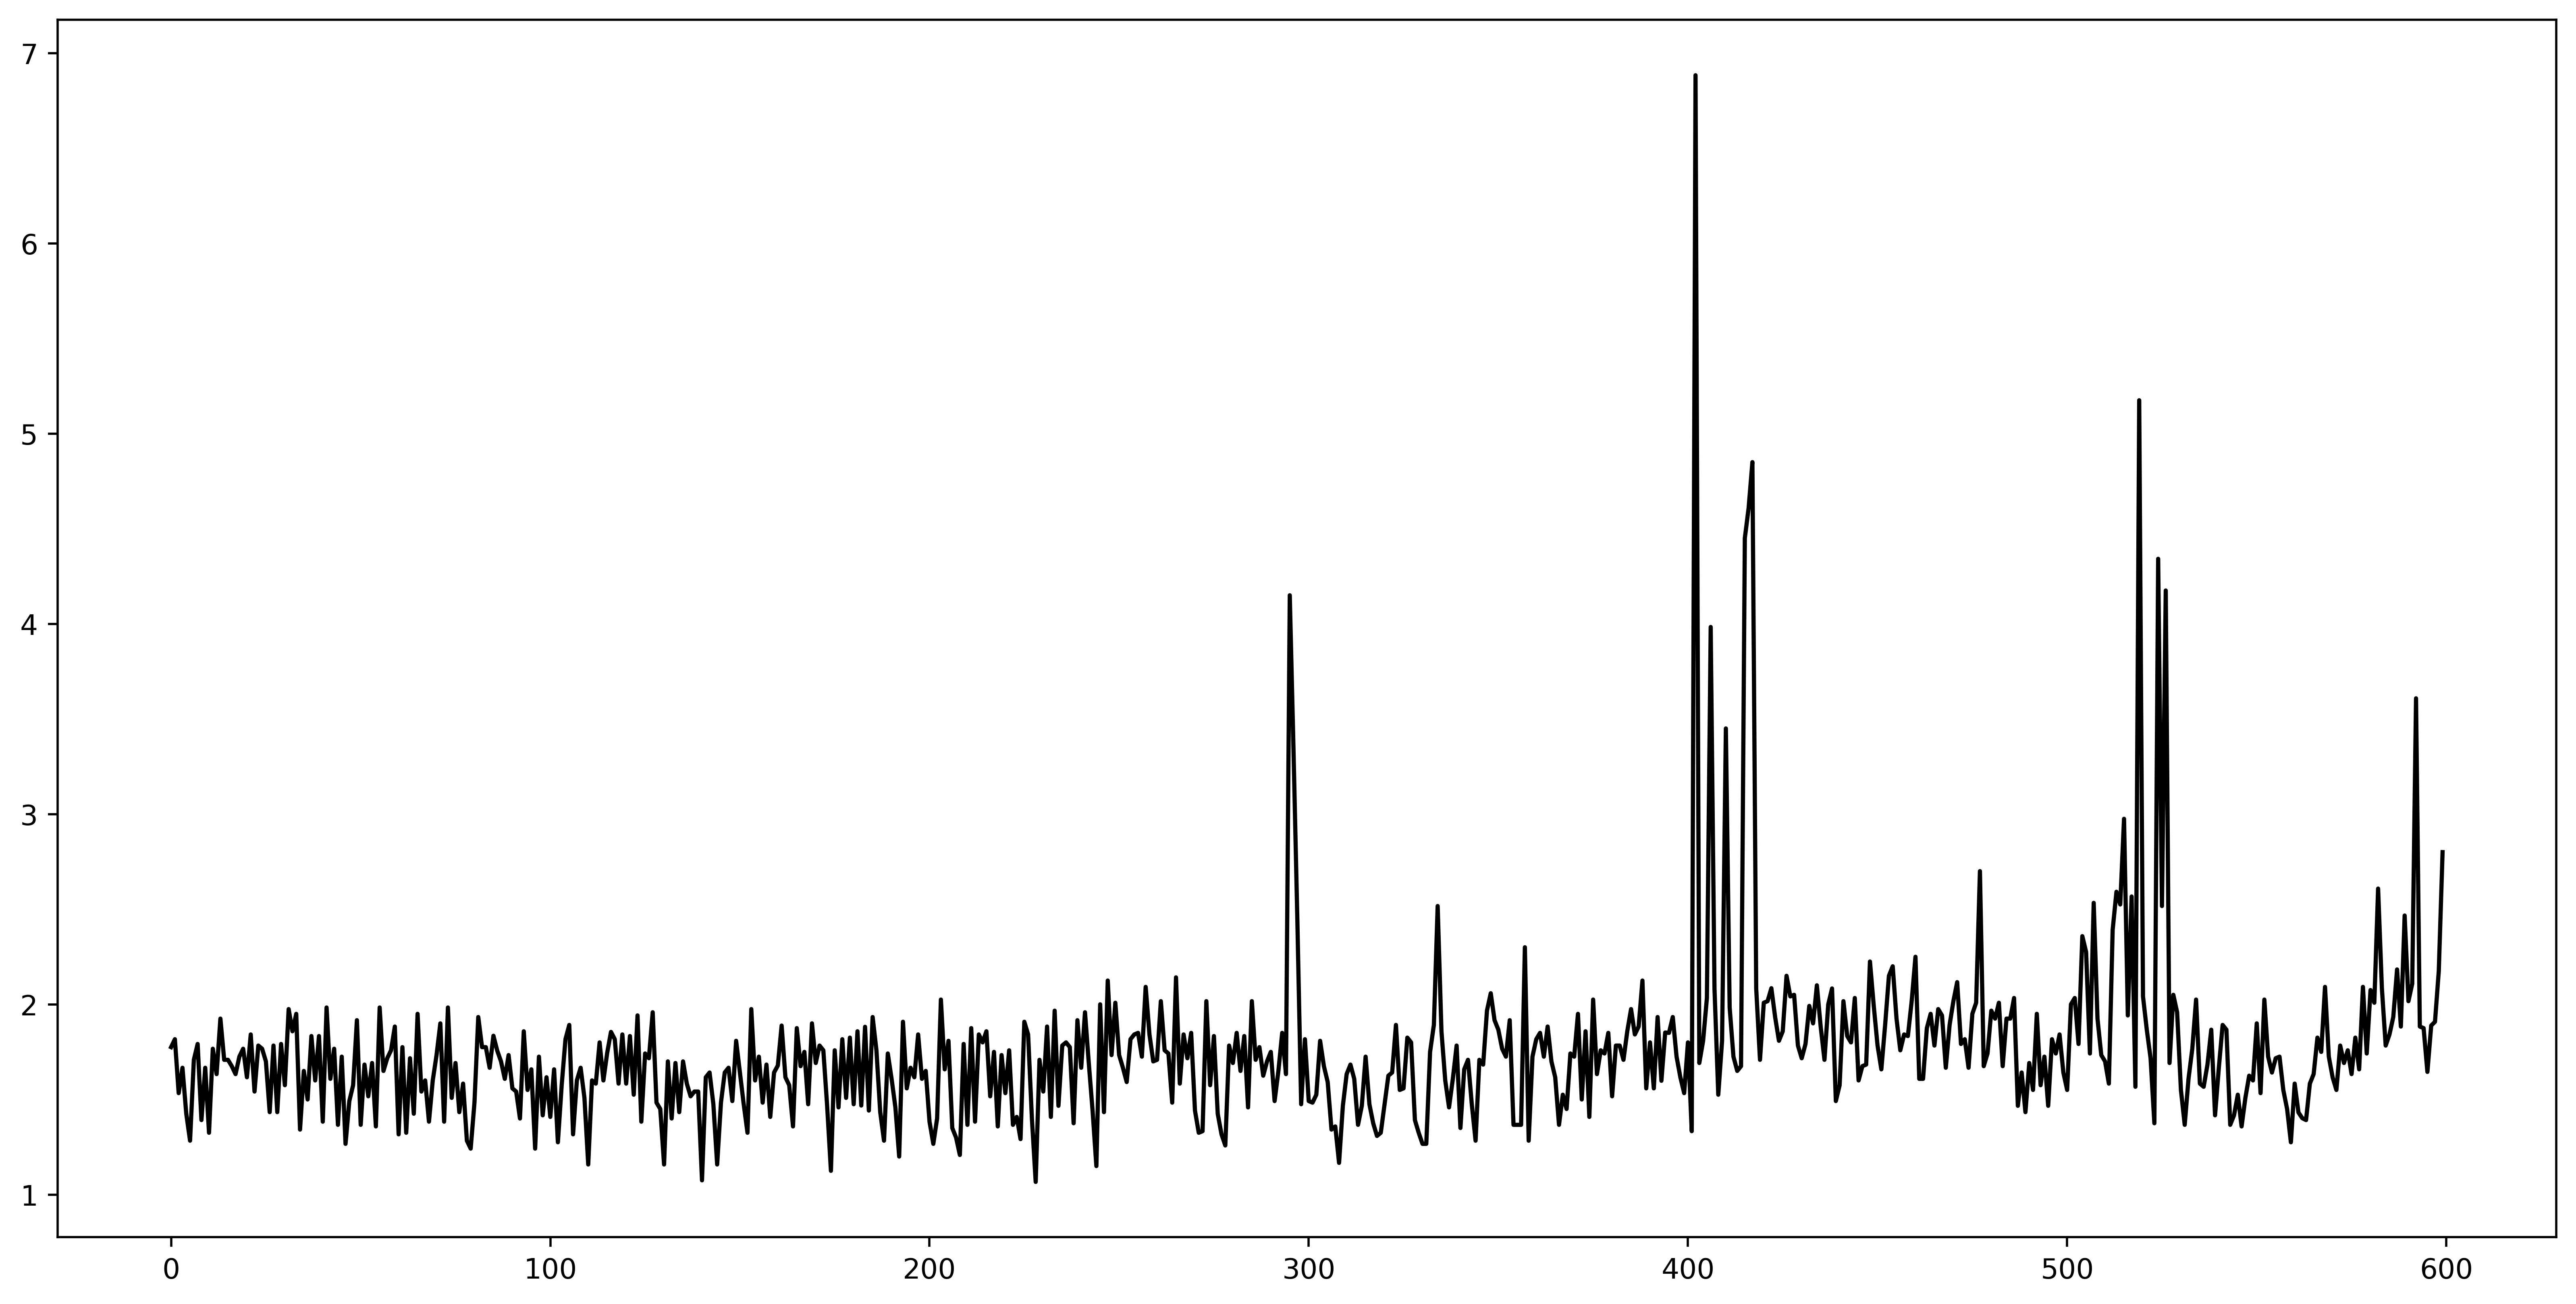

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
series = pd.read_excel(r'C:\Users\stu\Desktop\ALLDATA.xlsx').values
plt.figure(figsize=(16,8),dpi=500)
plt.plot(series[:,1][400:1000],linestyle='-',marker='',color = 'black')